In [314]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [315]:
customer_df = pd.read_csv('Customer.csv')
prod_cat_df = pd.read_csv('prod_cat_info.csv')
transactions_df = pd.read_csv('Transactions.csv')

In [316]:
customer_df

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0
...,...,...,...,...
5642,274474,19-12-1992,M,2.0
5643,267666,24-12-1992,M,6.0
5644,270476,25-12-1992,F,3.0
5645,269626,27-12-1992,F,5.0


In [317]:
prod_cat_df

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [318]:
transactions_df

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


In [319]:
customer_transaction = customer_df.merge(transactions_df, left_on='customer_Id', right_on='cust_id')

In [320]:
customer_transaction

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop
1,268408,02-01-1970,M,4.0,16197868036,268408,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store
2,268408,02-01-1970,M,4.0,16197868036,268408,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store
3,268408,02-01-1970,M,4.0,28810141075,268408,2/9/2013,10,6,2,813,170.730,1796.730,TeleShop
4,268408,02-01-1970,M,4.0,64633435931,268408,6/5/2013,4,2,3,312,98.280,1034.280,Flagship store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,269626,27-12-1992,F,5.0,71369029396,269626,18-10-2011,12,6,1,638,66.990,704.990,e-Shop
23049,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR
23050,274308,29-12-1992,F,5.0,26208690928,274308,22-10-2012,1,2,2,898,188.580,1984.580,MBR
23051,274308,29-12-1992,F,5.0,57358822237,274308,5/9/2012,1,2,4,876,367.920,3871.920,e-Shop


In [321]:
customer_final = customer_transaction.merge(prod_cat_df, left_on=['prod_subcat_code', 'prod_cat_code'], right_on = ['prod_sub_cat_code', 'prod_cat_code'], how = 'inner')

In [322]:
customer_final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,16-01-1970,M,4.0,73109425404,275152,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction
2,275034,18-01-1970,F,4.0,64777271023,275034,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction
3,270829,22-01-1970,F,8.0,87174343938,270829,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction
4,267657,29-01-1970,F,7.0,76242744953,267657,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,267812,04-12-1992,F,1.0,63540378797,267812,10/10/2012,10,5,3,224,70.560,742.560,TeleShop,Books,10,Non-Fiction
23049,274618,09-12-1992,F,7.0,71793203305,274618,17-08-2013,10,5,4,691,290.220,3054.220,Flagship store,Books,10,Non-Fiction
23050,268097,15-12-1992,F,7.0,91217108818,268097,1/2/2012,10,5,2,411,86.310,908.310,e-Shop,Books,10,Non-Fiction
23051,268097,15-12-1992,F,7.0,90114483354,268097,31-01-2011,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,10,Non-Fiction


In [323]:
customer_final.to_csv('Customer_Final.csv',index = False)

In [324]:
column_info = customer_final.dtypes

In [325]:
column_info

customer_Id            int64
DOB                   object
Gender                object
city_code            float64
transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object

In [326]:
customer_final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,16-01-1970,M,4.0,73109425404,275152,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction
2,275034,18-01-1970,F,4.0,64777271023,275034,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction
3,270829,22-01-1970,F,8.0,87174343938,270829,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction
4,267657,29-01-1970,F,7.0,76242744953,267657,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,267812,04-12-1992,F,1.0,63540378797,267812,10/10/2012,10,5,3,224,70.560,742.560,TeleShop,Books,10,Non-Fiction
23049,274618,09-12-1992,F,7.0,71793203305,274618,17-08-2013,10,5,4,691,290.220,3054.220,Flagship store,Books,10,Non-Fiction
23050,268097,15-12-1992,F,7.0,91217108818,268097,1/2/2012,10,5,2,411,86.310,908.310,e-Shop,Books,10,Non-Fiction
23051,268097,15-12-1992,F,7.0,90114483354,268097,31-01-2011,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,10,Non-Fiction


In [327]:
top_10 = customer_final.head(10)

In [328]:
bottom_10 = customer_final.tail(10)

In [329]:
top_10

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,16-01-1970,M,4.0,73109425404,275152,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction
2,275034,18-01-1970,F,4.0,64777271023,275034,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction
3,270829,22-01-1970,F,8.0,87174343938,270829,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction
4,267657,29-01-1970,F,7.0,76242744953,267657,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction
5,274630,01-02-1970,M,4.0,78357345891,274630,11/4/2012,7,5,1,646,67.830,713.830,TeleShop,Books,7,Fiction
6,273541,01-02-1970,M,4.0,23916816961,273541,9/2/2013,7,5,4,410,172.200,1812.200,e-Shop,Books,7,Fiction
7,269008,13-02-1970,F,6.0,35560569829,269008,9/3/2013,7,5,1,1441,151.305,1592.305,e-Shop,Books,7,Fiction
8,269008,13-02-1970,F,6.0,94033312891,269008,26-04-2012,7,5,5,746,391.650,4121.650,MBR,Books,7,Fiction
9,267199,14-02-1970,NaN,2.0,56749259881,267199,11/1/2012,7,5,4,1049,440.580,4636.580,MBR,Books,7,Fiction


In [330]:
bottom_10

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
23043,268914,15-11-1992,F,3.0,1407823655,268914,10/6/2011,10,5,1,1252,131.460,1383.460,MBR,Books,10,Non-Fiction
23044,269519,17-11-1992,M,9.0,29719500605,269519,24-12-2013,10,5,4,1036,435.120,4579.120,TeleShop,Books,10,Non-Fiction
23045,273524,25-11-1992,F,1.0,25762805863,273524,19-11-2012,10,5,1,1401,147.105,1548.105,Flagship store,Books,10,Non-Fiction
23046,272141,02-12-1992,F,10.0,71337087467,272141,22-07-2012,10,5,-3,-1422,447.930,-4713.930,e-Shop,Books,10,Non-Fiction
23047,272141,02-12-1992,F,10.0,71337087467,272141,16-07-2012,10,5,3,1422,447.930,4713.930,e-Shop,Books,10,Non-Fiction
23048,267812,04-12-1992,F,1.0,63540378797,267812,10/10/2012,10,5,3,224,70.560,742.560,TeleShop,Books,10,Non-Fiction
23049,274618,09-12-1992,F,7.0,71793203305,274618,17-08-2013,10,5,4,691,290.220,3054.220,Flagship store,Books,10,Non-Fiction
23050,268097,15-12-1992,F,7.0,91217108818,268097,1/2/2012,10,5,2,411,86.310,908.310,e-Shop,Books,10,Non-Fiction
23051,268097,15-12-1992,F,7.0,90114483354,268097,31-01-2011,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,10,Non-Fiction
23052,268097,15-12-1992,F,7.0,90114483354,268097,26-01-2011,10,5,4,1408,591.360,6223.360,e-Shop,Books,10,Non-Fiction


In [331]:
summary_var = customer_final['total_amt']

In [332]:
summary = summary_var.describe()

In [333]:
summary

count    23053.000000
mean      2107.308002
std       2507.561264
min      -8270.925000
25%        762.450000
50%       1754.740000
75%       3569.150000
max       8287.500000
Name: total_amt, dtype: float64

In [334]:
ft_gender = customer_final['Gender'].value_counts()

In [335]:
ft_gender

Gender
M    11811
F    11233
Name: count, dtype: int64

In [336]:
ft_Store_type = customer_final['Store_type'].value_counts()

In [337]:
ft_Store_type

Store_type
e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
Name: count, dtype: int64

In [338]:
ft_product_cat = customer_final['prod_cat'].value_counts()

In [339]:
ft_product_cat

prod_cat
Books               6069
Electronics         4898
Home and kitchen    4129
Footwear            2999
Clothing            2960
Bags                1998
Name: count, dtype: int64

In [340]:
ft_product_subcat = customer_final['prod_subcat'].value_counts()

In [341]:
ft_product_subcat

prod_subcat
Women                  3048
Mens                   2912
Kids                   1997
Tools                  1062
Fiction                1043
Kitchen                1037
Children               1035
Comics                 1031
Mobiles                1031
Bath                   1023
Furnishing             1007
Non-Fiction            1004
DIY                     989
Cameras                 985
Personal Appliances     972
Academic                967
Computers               958
Audio and video         952
Name: count, dtype: int64

In [342]:
ft_city = customer_final['city_code'].value_counts()

In [343]:
ft_city

city_code
4.0     2422
3.0     2411
5.0     2360
7.0     2356
10.0    2333
8.0     2330
2.0     2270
1.0     2258
9.0     2178
6.0     2127
Name: count, dtype: int64

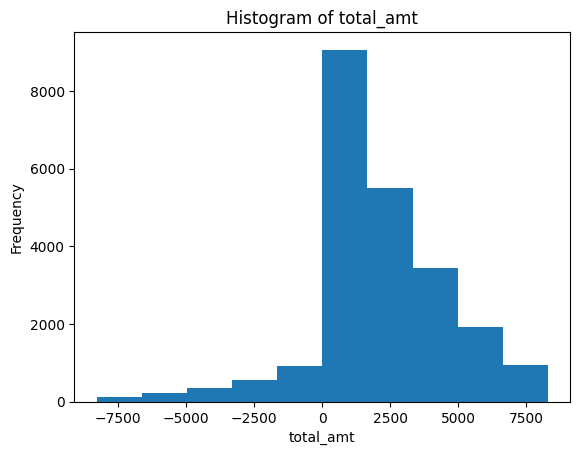

In [344]:
plt.hist(summary_var, bins=10)
plt.title('Histogram of ' + 'total_amt')
plt.xlabel('total_amt')
plt.ylabel('Frequency')
plt.show()

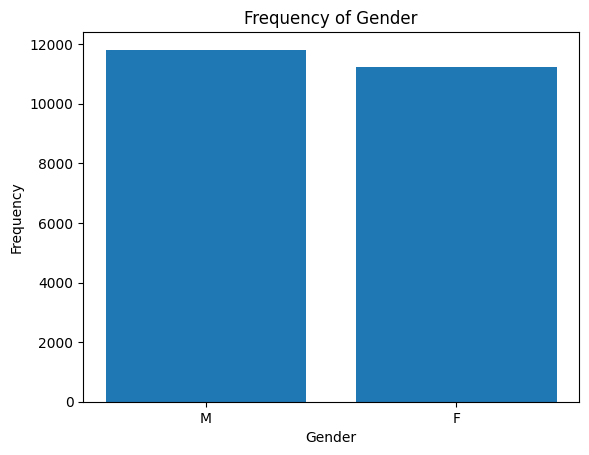

In [345]:
plt.bar(ft_gender.index, ft_gender.values)
plt.title('Frequency of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

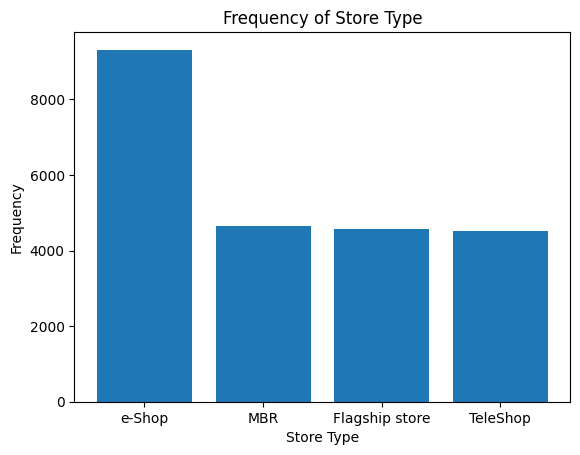

In [346]:
plt.bar(ft_Store_type.index, ft_Store_type.values)
plt.title('Frequency of Store Type')
plt.xlabel('Store Type')
plt.ylabel('Frequency')
plt.show()

In [347]:
def frequency_bar_plot(ft,variable):
    plt.bar(ft.index, ft.values)
    plt.title('Frequency of ' + variable)
    plt.xlabel(variable)
    plt.xticks(rotation = 45)
    plt.ylabel('Frequency')
    plt.show()

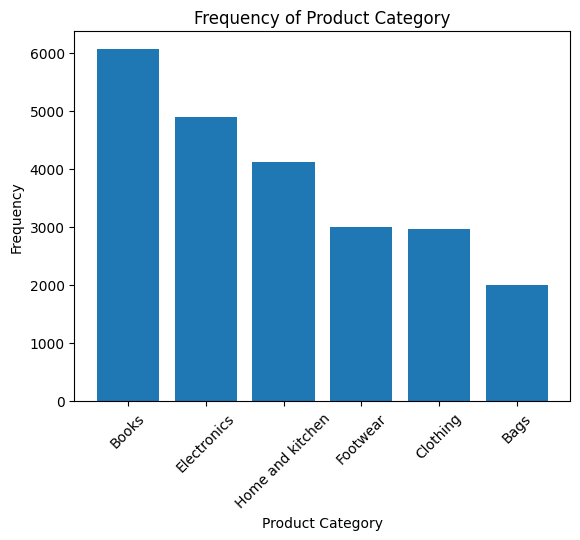

In [348]:
frequency_bar_plot(ft_product_cat,'Product Category')

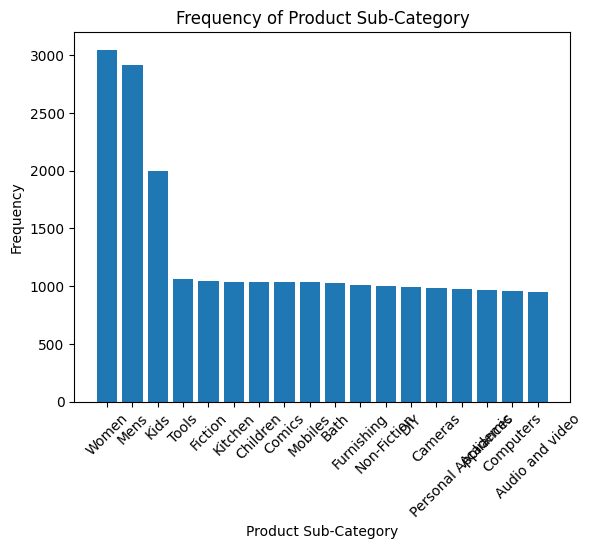

In [349]:
frequency_bar_plot(ft_product_subcat,'Product Sub-Category')

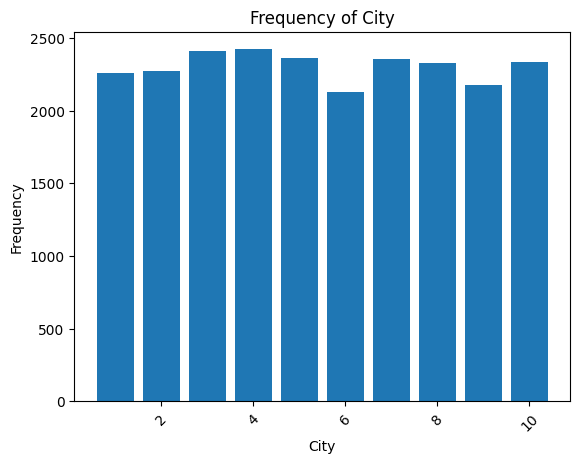

In [350]:
frequency_bar_plot(ft_city,'City')

In [351]:
dates = pd.to_datetime(customer_final['tran_date'], format='mixed', dayfirst = True)
earliest_date = dates.min()
latest_date = dates.max()
print("Transaction data is available from", earliest_date, "to", latest_date)

Transaction data is available from 2011-01-25 00:00:00 to 2014-02-28 00:00:00


In [352]:
negative_transactions = customer_final[customer_final['total_amt'] < 0]
num_negative_transactions = len(negative_transactions)
print("Number of transactions with negative total amount:", num_negative_transactions)

Number of transactions with negative total amount: 2177


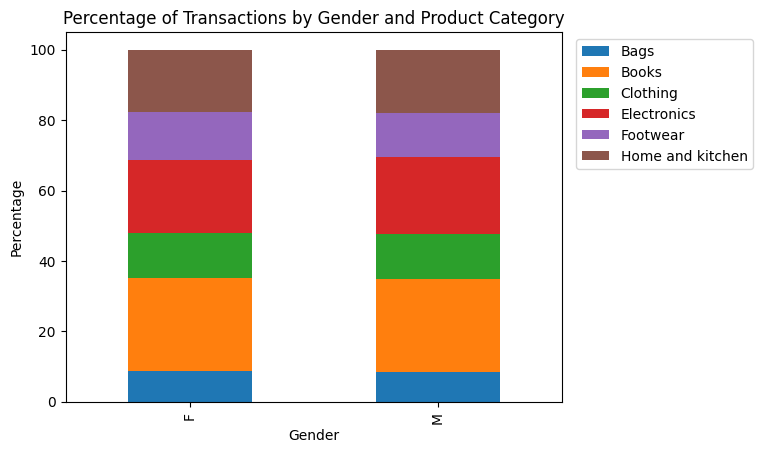

In [353]:
grouped_cust = customer_final.groupby(['Gender', 'prod_cat']).size().reset_index(name='count')
pivoted_df = grouped_cust.pivot(index='Gender', columns='prod_cat', values='count')
totals_df = pivoted_df.sum(axis=1)
percentages_df = pivoted_df.div(totals_df, axis=0) * 100
percentages_df.plot(kind='bar', stacked=True)
plt.title('Percentage of Transactions by Gender and Product Category')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.4, 1), loc='upper right', ncol=1)
plt.show()

In [354]:
grouped_cust

,Gender,prod_cat,count
typing.Literal[<no_default>],,,
0,F,Bags,994
1,F,Books,2949
2,F,Clothing,1439
3,F,Electronics,2328
4,F,Footwear,1529
5,F,Home and kitchen,1994
6,M,Bags,1004
7,M,Books,3116
8,M,Clothing,1518


In [355]:
pivoted_df

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,994,2949,1439,2328,1529,1994
M,1004,3116,1518,2570,1469,2134


In [356]:
totals_df

Gender
F    11233
M    11811
dtype: int64

In [357]:
percentages_df

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,8.848927,26.253005,12.810469,20.724651,13.611680,17.751269
M,8.500550,26.382186,12.852426,21.759377,12.437558,18.067903


In [358]:
grouped_city_cust = customer_final.groupby('city_code').size().reset_index(name='customer_count')
sorted_df = grouped_city_cust.sort_values(by='customer_count', ascending=False)
max_city_code = sorted_df.iloc[0]['city_code']
max_customer_count = sorted_df.iloc[0]['customer_count']
total_customer_count = customer_final.shape[0]
max_city_customer_percent = max_customer_count / total_customer_count * 100
print("City code with the maximum customers:", max_city_code)
print("Percentage of customers from this city: {:.2f}%".format(max_city_customer_percent))

City code with the maximum customers: 4.0
Percentage of customers from this city: 10.51%


In [359]:
sales_by_store = customer_final.groupby('Store_type').agg({'total_amt': 'sum', 'Qty': 'sum'}).reset_index()
sorted_sales = sales_by_store.sort_values(by=['total_amt', 'Qty'], ascending=False)
max_value_store = sorted_sales.iloc[0]['Store_type']
max_value_sales = sorted_sales.iloc[0]['total_amt']
max_quantity_store = sorted_sales.iloc[0]['Store_type']
max_quantity_sales = sorted_sales.iloc[0]['Qty']
print("Store type that sells the maximum products by value:", max_value_store)
print("Sales value for this store type: ${:.2f}".format(max_value_sales))
print("Store type that sells the maximum products by quantity:", max_quantity_store)
print("Sales quantity for this store type: {}".format(max_quantity_sales))

Store type that sells the maximum products by value: e-Shop
Sales value for this store type: $19824816.05
Store type that sells the maximum products by quantity: e-Shop
Sales quantity for this store type: 22763


In [360]:
flagship_df = customer_final[(customer_final['prod_cat'] == 'Electronics') | (customer_final['prod_cat'] == 'Clothing') & (customer_final['Store_type'] == 'Flagship store')]
total_amount = flagship_df['total_amt'].sum()
print("Total amount earned from Electronics and Clothing categories from Flagship Stores: ${:.2f}".format(total_amount))

Total amount earned from Electronics and Clothing categories from Flagship Stores: $11916886.87


In [361]:
male_cust_df = customer_final[(customer_final['Gender'] == 'M') & (customer_final['prod_cat'] == 'Electronics')]
total_amount_male_cust = male_cust_df['total_amt'].sum()
print("Total amount earned from Male customers and Electronics category: ${:.2f}".format(total_amount_male_cust))

Total amount earned from Male customers and Electronics category: $5703109.42


In [362]:
positive_amt_df = customer_final[customer_final['total_amt'] >=0]
ft_unique_cust = positive_amt_df['cust_id'].value_counts()
unique_cust10 = sum(ft_unique_cust > 10)
print("Total number of customers with more than 10 unique transactions: {}".format(unique_cust10))

Total number of customers with more than 10 unique transactions: 6


In [363]:
cust_dobs_df = customer_final

In [364]:
cust_dobs_df['DOB'] = pd.to_datetime(customer_final['DOB'], format='mixed', dayfirst = True)

In [365]:
today = dt.datetime.today().date()
cust_dobs_df['age'] = today.year - cust_dobs_df['DOB'].dt.year - ((today.month & today.day) < (cust_dobs_df['DOB'].dt.month & cust_dobs_df['DOB'].dt.day))

In [366]:
cust_dobs_df

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,age
0,268408,1970-01-02,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction,53
1,275152,1970-01-16,M,4.0,73109425404,275152,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction,53
2,275034,1970-01-18,F,4.0,64777271023,275034,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction,53
3,270829,1970-01-22,F,8.0,87174343938,270829,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction,53
4,267657,1970-01-29,F,7.0,76242744953,267657,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,267812,1992-12-04,F,1.0,63540378797,267812,10/10/2012,10,5,3,224,70.560,742.560,TeleShop,Books,10,Non-Fiction,31
23049,274618,1992-12-09,F,7.0,71793203305,274618,17-08-2013,10,5,4,691,290.220,3054.220,Flagship store,Books,10,Non-Fiction,30
23050,268097,1992-12-15,F,7.0,91217108818,268097,1/2/2012,10,5,2,411,86.310,908.310,e-Shop,Books,10,Non-Fiction,30
23051,268097,1992-12-15,F,7.0,90114483354,268097,31-01-2011,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,10,Non-Fiction,30


In [367]:
cust_25_35_dobs_df = cust_dobs_df[(cust_dobs_df['age']>25) & (cust_dobs_df['age']<35)]

In [368]:
cust_25_35_dobs_df

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,age
841,273463,1988-05-05,F,2.0,45880968528,273463,4/10/2012,7,5,5,684,359.10,3779.10,e-Shop,Books,7,Fiction,34
844,274988,1988-06-14,M,4.0,66190224419,274988,5/9/2013,7,5,-2,-100,21.00,-221.00,e-Shop,Books,7,Fiction,34
845,274988,1988-06-14,M,4.0,66190224419,274988,27-08-2013,7,5,2,100,21.00,221.00,e-Shop,Books,7,Fiction,34
847,268634,1988-07-05,M,2.0,59649211171,268634,17-01-2013,7,5,4,825,346.50,3646.50,Flagship store,Books,7,Fiction,34
848,272416,1988-07-21,F,1.0,20203474491,272416,17-03-2013,7,5,2,433,90.93,956.93,MBR,Books,7,Fiction,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,267812,1992-12-04,F,1.0,63540378797,267812,10/10/2012,10,5,3,224,70.56,742.56,TeleShop,Books,10,Non-Fiction,31
23049,274618,1992-12-09,F,7.0,71793203305,274618,17-08-2013,10,5,4,691,290.22,3054.22,Flagship store,Books,10,Non-Fiction,30
23050,268097,1992-12-15,F,7.0,91217108818,268097,1/2/2012,10,5,2,411,86.31,908.31,e-Shop,Books,10,Non-Fiction,30
23051,268097,1992-12-15,F,7.0,90114483354,268097,31-01-2011,10,5,-4,-1408,591.36,-6223.36,e-Shop,Books,10,Non-Fiction,30


In [369]:
age25_35_cust_df = cust_25_35_dobs_df[(cust_25_35_dobs_df['prod_cat'] == 'Electronics') | (cust_25_35_dobs_df['prod_cat'] == 'Books')]
total_amount_age_cust = age25_35_cust_df['total_amt'].sum()
print("Total amount earned from customers of age between 25 to 35 in Electronics and Books category: ${:.2f}".format(total_amount_age_cust))

Total amount earned from customers of age between 25 to 35 in Electronics and Books category: $4265182.87


In [389]:
cust_25_35_dt_df = cust_25_35_dobs_df.reset_index()

In [390]:
del cust_25_35_dt_df['index']
cust_25_35_dt_df

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,age
0,273463,1988-05-05,F,2.0,45880968528,273463,4/10/2012,7,5,5,684,359.10,3779.10,e-Shop,Books,7,Fiction,34
1,274988,1988-06-14,M,4.0,66190224419,274988,5/9/2013,7,5,-2,-100,21.00,-221.00,e-Shop,Books,7,Fiction,34
2,274988,1988-06-14,M,4.0,66190224419,274988,27-08-2013,7,5,2,100,21.00,221.00,e-Shop,Books,7,Fiction,34
3,268634,1988-07-05,M,2.0,59649211171,268634,17-01-2013,7,5,4,825,346.50,3646.50,Flagship store,Books,7,Fiction,34
4,272416,1988-07-21,F,1.0,20203474491,272416,17-03-2013,7,5,2,433,90.93,956.93,MBR,Books,7,Fiction,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,267812,1992-12-04,F,1.0,63540378797,267812,10/10/2012,10,5,3,224,70.56,742.56,TeleShop,Books,10,Non-Fiction,31
4371,274618,1992-12-09,F,7.0,71793203305,274618,17-08-2013,10,5,4,691,290.22,3054.22,Flagship store,Books,10,Non-Fiction,30
4372,268097,1992-12-15,F,7.0,91217108818,268097,1/2/2012,10,5,2,411,86.31,908.31,e-Shop,Books,10,Non-Fiction,30
4373,268097,1992-12-15,F,7.0,90114483354,268097,31-01-2011,10,5,-4,-1408,591.36,-6223.36,e-Shop,Books,10,Non-Fiction,30


In [391]:
cust_25_35_dt_df['tran_date'] = pd.to_datetime(cust_25_35_dt_df['tran_date'], format='mixed', dayfirst = True)

In [392]:
cust_25_35_dt_df

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,age
0,273463,1988-05-05,F,2.0,45880968528,273463,2012-10-04,7,5,5,684,359.10,3779.10,e-Shop,Books,7,Fiction,34
1,274988,1988-06-14,M,4.0,66190224419,274988,2013-09-05,7,5,-2,-100,21.00,-221.00,e-Shop,Books,7,Fiction,34
2,274988,1988-06-14,M,4.0,66190224419,274988,2013-08-27,7,5,2,100,21.00,221.00,e-Shop,Books,7,Fiction,34
3,268634,1988-07-05,M,2.0,59649211171,268634,2013-01-17,7,5,4,825,346.50,3646.50,Flagship store,Books,7,Fiction,34
4,272416,1988-07-21,F,1.0,20203474491,272416,2013-03-17,7,5,2,433,90.93,956.93,MBR,Books,7,Fiction,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,267812,1992-12-04,F,1.0,63540378797,267812,2012-10-10,10,5,3,224,70.56,742.56,TeleShop,Books,10,Non-Fiction,31
4371,274618,1992-12-09,F,7.0,71793203305,274618,2013-08-17,10,5,4,691,290.22,3054.22,Flagship store,Books,10,Non-Fiction,30
4372,268097,1992-12-15,F,7.0,91217108818,268097,2012-02-01,10,5,2,411,86.31,908.31,e-Shop,Books,10,Non-Fiction,30
4373,268097,1992-12-15,F,7.0,90114483354,268097,2011-01-31,10,5,-4,-1408,591.36,-6223.36,e-Shop,Books,10,Non-Fiction,30


In [395]:
cust_12014_32014_dt_df = cust_25_35_dt_df[(cust_25_35_dt_df['tran_date']>= '2014-01-01') & (cust_25_35_dt_df['tran_date']<= '2014-03-01')]
total_amount_agedate_cust = cust_12014_32014_dt_df['total_amt'].sum()
print("Total amount spent by customers of age between 25 to 35 between 1st Jan 2014 and 1st March 2014: ${:.2f}".format(total_amount_agedate_cust))

Total amount spent by customers of age between 25 to 35 between 1st Jan 2014 and 1st March 2014: $489228.81
